##  <center>Assessment 3</center>
##  <center>WebCrawler and NLP System</center>

### <font size="3"><center>Literature Review</center>
Due to the nature of wine descriptions, albeit from non-wine experts and experts, all use specific words, to describe wine. As mentioned in document 2, wine experts tend to use more frequently strong nouns and adjectives, where non-wine experts use week nouns and adjectives. 

An ‘online addiction recovery forums' study, where posted messages are moderated to detect risk, moderators spend many hours reading hundreds of messages, very time consuming[6]. Their paper looked at three classifiers SVM, decision tree and boosting decision tree, using, Bag-of-Words, Linguistic Inquiry and Word Count and a Hybrid (using the most important features from the other three classifiers). According to [6], and analysing 2581 messages, their study found that 'SVM performed worst with improvements in decision trees and best performance in boosted decision trees where we achieved F-scores of 0.88, 0.89, and 0.94 for the BoW, LIWC, and hybrid approaches, respectively'[Kornfield et a, 2018, p. 6). Boosted decision trees using the hybrid approach looked to perform the best. However, a study that applied POS to obscure languages [7], found that SVM with oneVsrest classification obtain an accuracy of 86%. It appears different models suit specific situations.
    
Nevertheless, and due this task using speech, the Support Vector Machines approach using a Part of Speech tagging (POS) with a Decision Tree Classifier (Random Forest) is appropriate. Support Vector Machines are widely used supervised machine learning algorithm [3][4]. They are reasonably easily you implement, understand and interpretable, however requires data preparation for example, normalisation [4]. POS tagging is a process of assigning a tag to every word in a sentence. It depends not only on the word whose tag ID identified, but also its neighbouring words. The same word can have different meanings depending on the context. 

The features used in SVM is the word itself, and SVM hyperparameters -  C=10, gamma=0.001, kernel='linear', cv=5

</font>


<font size="3">
    
[2] Sathya, R, Abraham, A (2013). Comparison of supervised and unsupervised learning algorithm for pattern classification. 
    *International Journal of Advanced Research in Artificial Intelligence*, *2*(3)   
    
[3] Patel, B, R, Rana, K, K (2014). A Survey on Decision Tree Algorithms for Classification.  *IJEDR*, *5*(1), ISSN: 2321-9939

[4] Wahbeh, A. H, Radaideh, Q. A, Kabi, Shawakfa, M. N (2012). A Comparison Study between Data Mining Tools over some 
    Classification Methods. *(IJACSA) International Journal of Advanced Computer Science and Applications*, 18-26.

[5] Quinlan, J. R, Rivest, R. L (1989). Inferring Decision Trees using Minimum Description Length Principle, *Information 
    and Computation*, *80*(3), 227-248, Academic Press, USA 
    
[6] Kornfield et al (2018). Detecting Recovery Problems Just in Time: Application of Automated Linguistic Analysis and
    Supervised Machine Learning to an Online Substance Abuse Forum, *Journal of Medical Internet Research*, *20*(6), 
    doi:10.2196/10136 

[7] Todi, K, K, Mishra, P, Sharma, D, M (2018). Building a Kannada POS Tagger Using Machine Learning and Neural Network Models,
    *JManipal Institute of Technology*, 1-10, arXiv:1808.03175v1  </font>

<font size="3"> The following section show NLP process using Part of Speech (POS) tagging with Support Vector Machines.</font>

In [1]:
import os
import fnmatch
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag,pos_tag_sents
import regex as re
import operator
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pickle
from nltk.corpus import stopwords

In [2]:
wine_data = pd.read_csv("final_wine_data.csv", encoding="ISO-8859-1")

In [3]:
wine_data.isna().sum()

Vintage                  0
Wine                     0
Expert_Rating            0
Price                    0
Price2                   0
Expert_Description    3665
desc_vivino           8970
Community_Rating      8969
Ex_Rating_Norm           0
Comm_Rating_Norm      8968
dtype: int64

<font size="3"> To distinguish between expert and no expert reviews, labels are applied, '1' for expert and '0' for non-wine expert. </font>

In [4]:
df_exp = pd.DataFrame(wine_data)
df_exp['Review'] = df_exp['Expert_Description'].copy()
df_exp = df_exp.dropna()
label = [1]*len(df_exp)
df_exp['Labels'] = label
df_exp[['Review', 'Labels']].head(15)

,Review,Labels
0,Pitch black heart with a deep dark red black t...,1
1,"Finely structured, beautifully balanced and bl...",1
2,Over the last decade or so Sanguine Estate hav...,1
3,Izway is a partnership of two well-travelled w...,1
4,Kalleskeâs Greenock Shiraz is a single viney...,1
5,Sourced from the original Pennyâs Hill viney...,1
6,Matured in French oak hogsheads for 18 months....,1
7,"Named after Stuart Blackwell, senior winemaker...",1
8,Fraser Gallopâs Parterre Cabernet takes its ...,1
9,Sons of Eden is a partnership between winemake...,1


In [5]:
df_cm = pd.DataFrame(wine_data)
df_cm['Review'] = df_cm['desc_vivino'].copy()
df_cm = df_exp.dropna()
label = [0]*len(df_cm)
df_cm['Labels'] = label
df_exp[['Review', 'Labels']].head(15)

,Review,Labels
0,Pitch black heart with a deep dark red black t...,1
1,"Finely structured, beautifully balanced and bl...",1
2,Over the last decade or so Sanguine Estate hav...,1
3,Izway is a partnership of two well-travelled w...,1
4,Kalleskeâs Greenock Shiraz is a single viney...,1
5,Sourced from the original Pennyâs Hill viney...,1
6,Matured in French oak hogsheads for 18 months....,1
7,"Named after Stuart Blackwell, senior winemaker...",1
8,Fraser Gallopâs Parterre Cabernet takes its ...,1
9,Sons of Eden is a partnership between winemake...,1


<font size="3"> Combine expert and non expert reviews with lables </font>

In [6]:
result = pd.concat([df_exp,df_cm],axis=0)
result['Review'] = result['Review'].map(lambda x: x.lower())
result[['Review', 'Labels']].head(15)

,Review,Labels
0,pitch black heart with a deep dark red black t...,1
1,"finely structured, beautifully balanced and bl...",1
2,over the last decade or so sanguine estate hav...,1
3,izway is a partnership of two well-travelled w...,1
4,kalleskeâs greenock shiraz is a single viney...,1
5,sourced from the original pennyâs hill viney...,1
6,matured in french oak hogsheads for 18 months....,1
7,"named after stuart blackwell, senior winemaker...",1
8,fraser gallopâs parterre cabernet takes its ...,1
9,sons of eden is a partnership between winemake...,1


In [7]:
import nltk
#nltk.download('stopwords')
stop = stopwords.words('english')
result['review_without_stopwords'] = result['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
result[['Review', 'Labels', 'review_without_stopwords']].head(15)

,Review,Labels,review_without_stopwords
0,pitch black heart with a deep dark red black t...,1,pitch black heart deep dark red black tinged h...
1,"finely structured, beautifully balanced and bl...",1,"finely structured, beautifully balanced blesse..."
2,over the last decade or so sanguine estate hav...,1,last decade sanguine estate steadily built rep...
3,izway is a partnership of two well-travelled w...,1,izway partnership two well-travelled winemaker...
4,kalleskeâs greenock shiraz is a single viney...,1,kalleskeâs greenock shiraz single vineyard w...
5,sourced from the original pennyâs hill viney...,1,"sourced original pennyâs hill vineyard, slig..."
6,matured in french oak hogsheads for 18 months....,1,matured french oak hogsheads 18 months. pitch ...
7,"named after stuart blackwell, senior winemaker...",1,"named stuart blackwell, senior winemaker st. h..."
8,fraser gallopâs parterre cabernet takes its ...,1,fraser gallopâs parterre cabernet takes insp...
9,sons of eden is a partnership between winemake...,1,sons eden partnership winemaker corey ryan vit...


<font size="3">Tease out the POS with the x and y, no stop words. </font>

In [8]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

os = result.review_without_stopwords.apply(pos)
os1 = pd.DataFrame(os)
os1.head()


,review_without_stopwords
0,"[(pitch, NN), (black, JJ), (heart, NN), (deep,..."
1,"[(finely, RB), (structured, VBN), (beautifully..."
2,"[(last, JJ), (decade, NN), (sanguine, JJ), (es..."
3,"[(izway, RB), (partnership, NN), (two, CD), (w..."
4,"[(kalleskeâs, NN), (greenock, NN), (shiraz, ..."


In [9]:
os1['pos'] = os1['review_without_stopwords'].map(lambda x:" ".join(["/".join(x) for x in x ]) )

In [10]:
result = result = pd.merge(result, os1,right_index=True,left_index = True)
result.head()

,Vintage,Wine,Expert_Rating,Price,Price2,Expert_Description,desc_vivino,Community_Rating,Ex_Rating_Norm,Comm_Rating_Norm,Review,Labels,review_without_stopwords_x,review_without_stopwords_y,pos
0,2016,Shaw & Smith Shiraz,97,$23.99,$515.88,Pitch black heart with a deep dark red black t...,Big bold red. Peppery and flavours of plum and...,4,0.97,0.8,pitch black heart with a deep dark red black t...,1,pitch black heart deep dark red black tinged h...,"[(pitch, NN), (black, JJ), (heart, NN), (deep,...",pitch/NN black/JJ heart/NN deep/JJ dark/NN red...
0,2016,Shaw & Smith Shiraz,97,$23.99,$515.88,Pitch black heart with a deep dark red black t...,Big bold red. Peppery and flavours of plum and...,4,0.97,0.8,pitch black heart with a deep dark red black t...,1,pitch black heart deep dark red black tinged h...,"[(pitch, NN), (black, JJ), (heart, NN), (deep,...",pitch/NN black/JJ heart/NN deep/JJ dark/NN red...
0,2016,Shaw & Smith Shiraz,97,$23.99,$515.88,Pitch black heart with a deep dark red black t...,Big bold red. Peppery and flavours of plum and...,4,0.97,0.8,pitch black heart with a deep dark red black t...,0,pitch black heart deep dark red black tinged h...,"[(pitch, NN), (black, JJ), (heart, NN), (deep,...",pitch/NN black/JJ heart/NN deep/JJ dark/NN red...
0,2016,Shaw & Smith Shiraz,97,$23.99,$515.88,Pitch black heart with a deep dark red black t...,Big bold red. Peppery and flavours of plum and...,4,0.97,0.8,pitch black heart with a deep dark red black t...,0,pitch black heart deep dark red black tinged h...,"[(pitch, NN), (black, JJ), (heart, NN), (deep,...",pitch/NN black/JJ heart/NN deep/JJ dark/NN red...
1,2014,Ring Bolt 21 Barriques Cabernet Sauvignon,97,$26.99,$269.88,"Finely structured, beautifully balanced and bl...",Strong plum and blackberry nose with some whit...,3.5,0.97,0.7,"finely structured, beautifully balanced and bl...",1,"finely structured, beautifully balanced blesse...","[(finely, RB), (structured, VBN), (beautifully...",finely/RB structured/VBN beautifully/RB balanc...


<font size="3">To compare results with little, training and testing is required. </font>

In [11]:
review_train, review_test, label_train, label_test = train_test_split(result['pos'],result['Labels'], test_size=0.2,random_state=13)

<font size="3"> Apply TFIDF vectorisation. </font>

In [12]:
tf_vect = TfidfVectorizer(lowercase = True, use_idf=True, smooth_idf=True, sublinear_tf=False)

X_train_tf = tf_vect.fit_transform(review_train)
X_test_tf = tf_vect.transform(review_test)

In [13]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [14]:
print(svc_param_selection(X_train_tf,label_train,5))

{'C': 0.001, 'gamma': 0.001}


In [15]:
#!pip install scikit-plot

<font size="3">Apply random forrest classifier. </font>

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100
building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100building tree 23 of 100

building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100building tree 68 of 100

building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


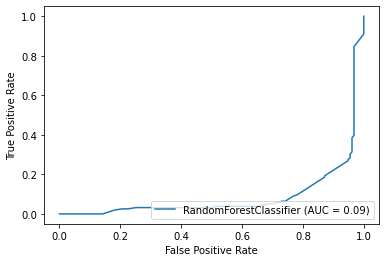

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.svm import SVC
import scikitplot as skplt
import matplotlib.pyplot as plt

clf = SVC(C=10,gamma=0.001,kernel='linear')
clf = RandomForestClassifier(verbose=2,n_jobs=-1,)

# clf = DecisionTreeClassifier()
clf.fit(X_train_tf,label_train)
pred = clf.predict(X_test_tf)

sklearn.metrics.plot_roc_curve(clf,X_test_tf,label_test)
plt.show()

<font size="3"> Save models for recall. </font>

In [17]:
with open('vectorizer.pickle', 'wb') as fin:
    pickle.dump(tf_vect, fin)

In [18]:
with open('mlmodel.pickle','wb') as f:
    pickle.dump(clf,f)

In [19]:
pkl = open('mlmodel.pickle', 'rb')
clf = pickle.load(pkl)   
vec = open('vectorizer.pickle', 'rb')
tf_vect = pickle.load(vec)

<font size="3"> Apply vector transform to test. </font>

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


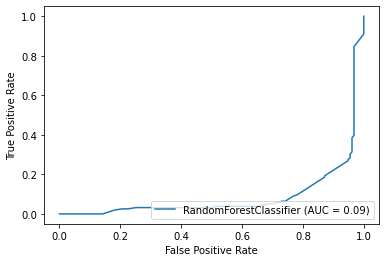

In [20]:
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
sklearn.metrics.plot_roc_curve(clf,X_test_tf,label_test)
plt.show()

<font size="3"> Retrieve test statistics. </font>

In [21]:
print(metrics.accuracy_score(label_test, pred))

0.15755627009646303


In [22]:
print (confusion_matrix(label_test, pred))

[[ 29 126]
 [136  20]]


In [23]:
print (classification_report(label_test, pred))

              precision    recall  f1-score   support

           0       0.18      0.19      0.18       155
           1       0.14      0.13      0.13       156

    accuracy                           0.16       311
   macro avg       0.16      0.16      0.16       311
weighted avg       0.16      0.16      0.16       311



In [24]:
review_train, review_test, label_train, label_test = train_test_split(result['pos'],result['Labels'], test_size=0.2,random_state=1)

In [25]:
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [26]:
print(metrics.accuracy_score(label_test, pred))

0.5209003215434084


In [27]:
print (confusion_matrix(label_test, pred))

[[89 83]
 [66 73]]


In [28]:
print (classification_report(label_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       172
           1       0.47      0.53      0.49       139

    accuracy                           0.52       311
   macro avg       0.52      0.52      0.52       311
weighted avg       0.53      0.52      0.52       311



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


0.5273311897106109
[[90 75]
 [72 74]]
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       165
           1       0.50      0.51      0.50       146

    accuracy                           0.53       311
   macro avg       0.53      0.53      0.53       311
weighted avg       0.53      0.53      0.53       311



[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


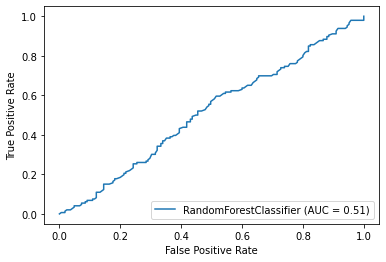

In [29]:
review_train, review_test, label_train, label_test = train_test_split(result['pos'],result['Labels'], test_size=0.2,random_state=42)
X_test_tf = tf_vect.transform(review_test)
pred = clf.predict(X_test_tf)
print(metrics.accuracy_score(label_test, pred))
print (confusion_matrix(label_test, pred))
print (classification_report(np.array(label_test), pred))
sklearn.metrics.plot_roc_curve(clf,X_test_tf,label_test)
plt.show()